# **Data Cleaning**

In [ ]:
# import required libraries
import pandas as pd
import numpy as np

In [ ]:
#read the 2023 csv
df = pd.read_csv('FY2023_068_Contracts_Full_20240214_1.csv')

<ipython-input-2-c1c32e8c7ea1>:2: DtypeWarning: Columns (47,52,68,81,164,165) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('FY2023_068_Contracts_Full_20240214_1.csv')


In [ ]:
# view the shape of the data
print(df.shape)

(12542, 297)


In [ ]:
# Set display option to show all columns
pd.set_option('display.max_columns', None)

# show the % of missing values in each column and sort high to low
missing = df.isnull().mean() * 100
print(missing.sort_values(ascending=False))

dod_claimant_program_description                           100.0
dod_claimant_program_code                                  100.0
dod_acquisition_program_code                               100.0
dod_acquisition_program_description                        100.0
recipient_parent_duns                                      100.0
                                                           ...  
performance_based_service_acquisition_code                   0.0
performance_based_service_acquisition                        0.0
contingency_humanitarian_or_peacekeeping_operation_code      0.0
contingency_humanitarian_or_peacekeeping_operation           0.0
last_modified_date                                           0.0
Length: 297, dtype: float64


In [ ]:
# list columns with more than 50% missing values
missing_values = df.columns[df.isnull().mean() > 0.6]
missing_values

Index(['outlayed_amount_from_COVID-19_supplementals_for_overall_award',
       'obligated_amount_from_COVID-19_supplementals_for_overall_award',
       'outlayed_amount_from_IIJA_supplemental_for_overall_award',
       'obligated_amount_from_IIJA_supplemental_for_overall_award',
       'ordering_period_end_date', 'sam_exception',
       'sam_exception_description', 'recipient_duns',
       'recipient_doing_business_as_name', 'recipient_parent_duns',
       'recipient_address_line_2', 'idv_type_code', 'idv_type',
       'multiple_or_single_award_idv_code', 'multiple_or_single_award_idv',
       'type_of_idc_code', 'type_of_idc', 'dod_claimant_program_code',
       'dod_claimant_program_description', 'dod_acquisition_program_code',
       'dod_acquisition_program_description',
       'information_technology_commercial_item_category_code',
       'information_technology_commercial_item_category',
       'type_of_set_aside_code', 'type_of_set_aside', 'research_code',
       'research', 'ot

In [ ]:
# delete columns with more than 60% missing values
df_copy = df.drop(columns=missing_values)

In [ ]:
# show the shape after columns removed
print(df_copy.shape)

(12542, 248)


In [ ]:
#filter for women owned smalled business column where it equals to "t"
filter_1 = df_copy[df_copy['women_owned_small_business'] == 't']
filter_1.shape

(868, 248)

In [ ]:
#filter for minority_owned_business
filter_2 = df_copy[df_copy['minority_owned_business'] == 't']
filter_2.shape

(1831, 248)

In [ ]:
#filter for small business where it equals to "S"
filter_3 = df_copy[df_copy['contracting_officers_determination_of_business_size_code'] == 'S']
filter_3.shape

(5744, 248)

In [ ]:
#concat all the filters and delete duplicates
df_concat = pd.concat([filter_1, filter_2, filter_3]).drop_duplicates()
df_concat.shape

(5830, 248)

In [ ]:
#if the contract_award_unique_key is the same, only keep the row that the action date is the latest
df_concat['action_date'] = pd.to_datetime(df_concat['action_date'])
df_concat.sort_values(by=['contract_award_unique_key', 'action_date'], inplace=True)
df_concat.drop_duplicates(subset=['contract_award_unique_key'], keep='last', inplace=True)
df_concat.shape

(3022, 248)

In [ ]:
# Load the CSV file containing column names into a DataFrame
columns_df = ['alaskan_native_corporation_owned_firm',
 'alaskan_native_servicing_institution',
 'american_indian_owned_business',
 'asian_pacific_american_owned_business',
 'black_american_owned_business',
 'economically_disadvantaged_women_owned_small_business',
 'joint_venture_economic_disadvantaged_women_owned_small_bus',
 'joint_venture_women_owned_small_business',
 'naics_code',
 'product_or_service_code',
 'small_disadvantaged_business',
 'self_certified_small_disadvantaged_business',
 'emerging_small_business',
 'other_minority_owned_business',
 'minority_owned_business',
 'woman_owned_business',
 'women_owned_small_business',
 'sba_certified_8a_joint_venture',
 'program_activities_funding_this_award',
 'object_classes_funding_this_award',
 'epa_designated_product_code'
 ]

# Select columns based on the list of column names, also select the contract_award_unique_key, and the potential_total_value_of_award
selected_df = df_concat[columns_df + ['contract_award_unique_key', 'potential_total_value_of_award']]

selected_df.shape

(3022, 23)

In [ ]:
pd.set_option('display.max_rows', None)

# show the % of missing values in each column and sort high to low
missing = selected_df.isnull().mean() * 100
print(missing.sort_values(ascending=False))

epa_designated_product_code                                   7.379219
object_classes_funding_this_award                             4.963600
program_activities_funding_this_award                         4.963600
naics_code                                                    0.231635
alaskan_native_corporation_owned_firm                         0.000000
emerging_small_business                                       0.000000
contract_award_unique_key                                     0.000000
sba_certified_8a_joint_venture                                0.000000
women_owned_small_business                                    0.000000
woman_owned_business                                          0.000000
minority_owned_business                                       0.000000
other_minority_owned_business                                 0.000000
self_certified_small_disadvantaged_business                   0.000000
alaskan_native_servicing_institution                          0.000000
small_

# Feature Engineering
Select the features we will use and test their correlation with our target feature: potential_total_value_of_award



In [ ]:
# Select the desired columns
selected_columns = [
    'sba_certified_8a_joint_venture',
    'program_activities_funding_this_award',
    'object_classes_funding_this_award',
    'epa_designated_product_code'
]

# Create a new DataFrame with only the selected columns
corr_df = selected_df[selected_columns]
#set up to see all outputs, not truncated
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

corr_df

sba_certified_8a_joint_venture  \
2019                               f   
7256                               f   
8348                               f   
9871                               t   
4453                               f   
853                                f   
9188                               f   
11154                              f   
8441                               f   
11766                              f   
8486                               f   
12148                              f   
5425                               f   
11211                              f   
10729                              f   
9444                               f   
1569                               f   
9577                               f   
6992                               t   
3017                               f   
6117                               f   
9000                               f   
10624                              f   
8345                               f   
11906                              f   
9311                               f   
11726                              f   
721                                f   
11745                              f   
3748                               f   
11084                              f   
11306                              f   
11565                              f   
4075                               f   
8481                               f   
7603                               f   
2968                               f   
6398                               f   
10939                              f   
2949                               f   
7325                               f   
5026                               f   
1859                               f   
6919                               f   
3                                  f   
128                                f   
1648                               f   
9034                               f   
8986                               f   
10811                              f   
11031                              f   
6512                               f   
11940                              f   
1458                               f   
7101                               f   
11309                              f   
4204                               f   
5405                               f   
6135                               f   
6277                               f   
4529                               f   
5001                               f   
114                                f   
2071                               f   
9572                               f   
9495                               f   
5824                               f   
11616                              f   
3777                               f   
4368                               f   
11827                              f   
6568                               f   
12461                              f   
8187                               f   
758                                f   
7269                               f   
8797                               f   
8040                               f   
5850                               f   
9863                               f   
936                                f   
12096                              f   
4892                               f   
1988                               f   
8167                               f   
3518                               f   
8213                               f   
12009                              f   
6574                               f   
3055                               f   
5904                               f   
6575                               f   
8056                               f   
3031                               f   
8015                               f   
1997                               f   
10012                              f   
5447                               f   
9470                               f   
11809 

In [ ]:
#View % of missing columns for our selected df

# Set display option to show all columns
pd.set_option('display.max_columns', None)

# show the % of missing values in each column and sort high to low
missing = selected_df.isnull().mean() * 100
print(missing.sort_values(ascending=False))

epa_designated_product_code                                   7.379219
object_classes_funding_this_award                             4.963600
program_activities_funding_this_award                         4.963600
naics_code                                                    0.231635
alaskan_native_corporation_owned_firm                         0.000000
emerging_small_business                                       0.000000
contract_award_unique_key                                     0.000000
sba_certified_8a_joint_venture                                0.000000
women_owned_small_business                                    0.000000
woman_owned_business                                          0.000000
minority_owned_business                                       0.000000
other_minority_owned_business                                 0.000000
self_certified_small_disadvantaged_business                   0.000000
alaskan_native_servicing_institution                          0.000000
small_

In [ ]:
selected_df.nunique()

alaskan_native_corporation_owned_firm                            2
alaskan_native_servicing_institution                             1
american_indian_owned_business                                   2
asian_pacific_american_owned_business                            2
black_american_owned_business                                    2
economically_disadvantaged_women_owned_small_business            2
joint_venture_economic_disadvantaged_women_owned_small_bus       2
joint_venture_women_owned_small_business                         2
naics_code                                                     170
product_or_service_code                                        277
small_disadvantaged_business                                     2
self_certified_small_disadvantaged_business                      2
emerging_small_business                                          2
other_minority_owned_business                                    2
minority_owned_business                                       

In [ ]:
#functions to clean potential_total_value_of_award so we will have only the main category
#Example: 00D2: SUPERFUND:  REMEDIAL will be SUPERFUND
def extract_part(text):
    if pd.isna(text):  # Check if the value is NaN
        return np.nan
    elif isinstance(text, str):  # Check if text is a string
        # Check if the semicolon exists in the text
        if ';' in text:
            # Split the text based on the semicolon and take the second part
            text = text.split(';', 1)[1]
        # Split the text based on colon and take the first part
        parts = text.split(':', 1)[1].strip()
        # Check if the part still contains a semicolon
        if ';' in parts:
            # Return the text before the semicolon
            return parts.split(';', 1)[0].strip()
        else:
            # Check if the part still contains a colon
            if ':' in parts:
                # Return the text before the first colon
                return parts.split(':', 1)[0].strip()
            # If no semicolon or colon, return the part itself
            return parts

selected_df = selected_df.copy()
# Apply function to create new column using .loc
selected_df.loc[:, 'program_activities_genre'] = selected_df['program_activities_funding_this_award'].apply(extract_part)

# Apply another function to modify the newly created column
selected_df.loc[:, 'program_activities_genre'] = selected_df['program_activities_genre'].apply(lambda x: x.split(':', 1)[0].strip() if isinstance(x, str) and ':' in x else x)

print(selected_df.nunique())


alaskan_native_corporation_owned_firm                            2
alaskan_native_servicing_institution                             1
american_indian_owned_business                                   2
asian_pacific_american_owned_business                            2
black_american_owned_business                                    2
economically_disadvantaged_women_owned_small_business            2
joint_venture_economic_disadvantaged_women_owned_small_bus       2
joint_venture_women_owned_small_business                         2
naics_code                                                     170
product_or_service_code                                        277
small_disadvantaged_business                                     2
self_certified_small_disadvantaged_business                      2
emerging_small_business                                          2
other_minority_owned_business                                    2
minority_owned_business                                       

In [ ]:
print(selected_df['program_activities_genre'].unique())

['HOMELAND SECURITY' 'FACILITIES INFRASTRUCTURE AND OPERATIONS'
 'HUMAN HEALTH RISK ASSESSMENT' 'SUPERFUND' 'CRIMINAL ENFORCEMENT'
 'HOMELAND SEC' 'UNKNOWN' 'RESEARCH'
 'FEDERAL VEHICLE AND FUELS STANDARDS AND CERTIFICATION' nan
 'CATEGORICAL GRANT' 'TOXIC SUBSTANCES' 'BROWNFIELDS' 'FORENSICS SUPPORT'
 'IT / DATA MANAGEMENT' 'RADIATION' 'NEPA IMPLEMENTATION'
 'DRINKING WATER PROGRAMS' 'OIL SPILL' 'CLIMATE PROTECTION PROGRAM'
 'POLLUTION PREVENTION PROGRAM' 'RCRA' 'COMPLIANCE MONITORING'
 'CIVIL ENFORCEMENT' 'GREAT LAKES RESTORATION'
 'CENTRAL PLANNING, BUDGETING, AND FINANCE' 'BROWNFIELDS PROJECTS'
 'FEDERAL SUPPORT FOR AIR QUALITY MANAGEMENT' 'MARINE POLLUTION'
 'ENVIRONMENTAL JUSTICE' 'SURFACE WATER PROTECTION' 'GEOGRAPHIC PROGRAM'
 'REGIONAL SCIENCE AND TECHNOLOGY' 'PESTICIDES'
 'ALASKA CONTAMINATED LANDS' 'FEDERAL STATIONARY SOURCE REGULATIONS'
 'REGULATORY INNOVATION' 'LUST / UST' 'HUMAN RESOURCES MANAGEMENT'
 'AUDITS, EVALUATIONS, AND INVESTIGATIONS' 'ENDOCRINE DISRUPTORS'
 'TRIB

In [ ]:
selected_df.nunique()

alaskan_native_corporation_owned_firm                            2
alaskan_native_servicing_institution                             1
american_indian_owned_business                                   2
asian_pacific_american_owned_business                            2
black_american_owned_business                                    2
economically_disadvantaged_women_owned_small_business            2
joint_venture_economic_disadvantaged_women_owned_small_bus       2
joint_venture_women_owned_small_business                         2
naics_code                                                     170
product_or_service_code                                        277
small_disadvantaged_business                                     2
self_certified_small_disadvantaged_business                      2
emerging_small_business                                          2
other_minority_owned_business                                    2
minority_owned_business                                       

In [ ]:
#group 68 program_activities_genre into broader categories
# Mapping of original categories to broader categories
category_mapping = {
    'HOMELAND SECURITY': 'Policy and Governance',
    'FACILITIES INFRASTRUCTURE AND OPERATIONS': 'Policy and Governance',
    'HUMAN HEALTH RISK ASSESSMENT': 'Health and Safety',
    'SUPERFUND': 'Environmental Protection and Restoration',
    'CRIMINAL ENFORCEMENT': 'Health and Safety',
    'HOMELAND SEC': 'Policy and Governance',
    'UNKNOWN': 'Unknown',
    'RESEARCH': 'Research, Technology, and Innovation',
    'FEDERAL VEHICLE AND FUELS STANDARDS AND CERTIFICATION': 'Compliance and Enforcement',
    'CATEGORICAL GRANT': 'Program and Financial Management',
    'TOXIC SUBSTANCES': 'Health and Safety',
    'BROWNFIELDS': 'Environmental Protection and Restoration',
    'FORENSICS SUPPORT': 'Research, Technology, and Innovation',
    'IT / DATA MANAGEMENT': 'Research, Technology, and Innovation',
    'RADIATION': 'Health and Safety',
    'NEPA IMPLEMENTATION': 'Research, Technology, and Innovation',
    'DRINKING WATER PROGRAMS': 'Health and Safety',
    'OIL SPILL': 'Environmental Protection and Restoration',
    'CLIMATE PROTECTION PROGRAM': 'Environmental Protection and Restoration',
    'POLLUTION PREVENTION PROGRAM': 'Environmental Protection and Restoration',
    'RCRA': 'Compliance and Enforcement',
    'COMPLIANCE MONITORING': 'Compliance and Enforcement',
    'CIVIL ENFORCEMENT': 'Compliance and Enforcement',
    'GREAT LAKES RESTORATION': 'Environmental Protection and Restoration',
    'CENTRAL PLANNING, BUDGETING, AND FINANCE': 'Program and Financial Management',
    'BROWNFIELDS PROJECTS': 'Environmental Protection and Restoration',
    'FEDERAL SUPPORT FOR AIR QUALITY MANAGEMENT': 'Compliance and Enforcement',
    'MARINE POLLUTION': 'Environmental Protection and Restoration',
    'ENVIRONMENTAL JUSTICE': 'Community and Tribal Support',
    'SURFACE WATER PROTECTION': 'Environmental Protection and Restoration',
    'GEOGRAPHIC PROGRAM': 'Environmental Protection and Restoration',
    'REGIONAL SCIENCE AND TECHNOLOGY': 'Research, Technology, and Innovation',
    'PESTICIDES': 'Environmental Protection and Restoration',
    'ALASKA CONTAMINATED LANDS': 'Environmental Protection and Restoration',
    'FEDERAL STATIONARY SOURCE REGULATIONS': 'Compliance and Enforcement',
    'REGULATORY INNOVATION': 'Compliance and Enforcement',
    'LUST / UST': 'Policy and Governance',
    'HUMAN RESOURCES MANAGEMENT': 'Policy and Governance',
    'AUDITS, EVALUATIONS, AND INVESTIGATIONS': 'Policy and Governance',
    'ENDOCRINE DISRUPTORS': 'Research, Technology, and Innovation',
    'TRIBAL - CAPACITY BUILDING': 'Community and Tribal Support',
    'WATER INFRASTRUCTURE FINANCE AND INNOVATION': 'Research, Technology, and Innovation',
    'NATIONAL ESTUARY PROGRAM / COASTAL WATERWAYS': 'Environmental Protection and Restoration',
    'WETLANDS': 'Environmental Protection and Restoration',
    'FINANCIAL ASSISTANCE GRANTS / IAG MANAGEMENT': 'Program and Financial Management',
    'CONGRESSIONAL, INTERGOVERNMENTAL, EXTERNAL RELATIONS': 'Policy and Governance',
    'INFRASTRUCTURE ASSISTANCE': 'Program and Financial Management',
    'ADMIN': 'Program and Financial Management',
    'SAFE WATER FOR SMALL AND DISADVANTAGES COMMUNITIES': 'Health and Safety',
    'ADMINISTRATIVE LAW': 'Policy and Governance',
    'SMALL BUSINESS OMBUDSMAN': 'Community and Tribal Support',
    'REDUCE RISKS FROM INDOOR AIR': 'Health and Safety',
    'CLEAN AIR ALLOWANCE TRADING PROGRAMS': 'Environmental Protection and Restoration',
    'CIVIL RIGHTS/TITLE VI COMPLIANCE': 'Compliance and Enforcement',
    'ACQUISITION MANAGEMENT': 'Program and Financial Management',
    'BEACH / FISH PROGRAMS': 'Environmental Protection and Restoration',
    'ENVIRONMENTAL EDUCATION': 'Research, Technology, and Innovation',
    'EXCHANGE NETWORK': 'Research, Technology, and Innovation',
    'TRADE AND GOVERNANCE': 'Policy and Governance',
    'INDOOR AIR': 'Health and Safety',
    'SMALL MINORITY BUSINESS ASSISTANCE': 'Community and Tribal Support',
    'SCIENCE ADVISORY BOARD': 'Research, Technology, and Innovation',
    'LEGAL ADVICE': 'Policy and Governance',
    'CHILDREN & OTHER SENSITIVE POPULATIONS': 'Health and Safety',
    'AIR POLLUTION': 'Health and Safety',
    'SCIENCE POLICY AND BIOTECHNOLOGY': 'Research, Technology, and Innovation',
    'DIESEL EMISSIONS REDUCTION GRANT PROGRAM': 'Environmental Protection and Restoration',
    'INTEGRATED ENVIRONMENTAL STRATEGIES': 'Environmental Protection and Restoration',
}
selected_df = selected_df.copy()
# Apply the mapping to the dataframe
selected_df.loc[:, 'broad_program_category'] = selected_df['program_activities_genre'].copy().map(category_mapping)

#print(selected_df['broad_category'])
#broad_category unique
print(selected_df['broad_program_category'].unique())

['Policy and Governance' 'Health and Safety'
 'Environmental Protection and Restoration' 'Unknown'
 'Research, Technology, and Innovation' 'Compliance and Enforcement' nan
 'Program and Financial Management' 'Community and Tribal Support']


In [ ]:
# Apply function to create new column using .loc
selected_df.loc[:, 'object_genre'] = selected_df['object_classes_funding_this_award'].apply(extract_part)

# Apply another function to modify the newly created column
selected_df.loc[:, 'object_genre'] = selected_df['object_genre'].apply(lambda x: x.split(':', 1)[0].strip() if isinstance(x, str) and ':' in x else x)

print(selected_df.nunique())

alaskan_native_corporation_owned_firm                            2
alaskan_native_servicing_institution                             1
american_indian_owned_business                                   2
asian_pacific_american_owned_business                            2
black_american_owned_business                                    2
economically_disadvantaged_women_owned_small_business            2
joint_venture_economic_disadvantaged_women_owned_small_bus       2
joint_venture_women_owned_small_business                         2
naics_code                                                     170
product_or_service_code                                        277
small_disadvantaged_business                                     2
self_certified_small_disadvantaged_business                      2
emerging_small_business                                          2
other_minority_owned_business                                    2
minority_owned_business                                       

In [ ]:
print(selected_df['object_genre'].unique())

['Supplies and materials' 'Land and structures'
 'Other services from non-Federal sources' 'Equipment'
 'Research and development contracts' nan
 'Grants, subsidies, and contributions'
 'Operation and maintenance of facilities'
 'Other goods and services from Federal sources'
 'Operation and maintenance of equipment'
 'Advisory and assistance services' 'Rental payments to others'
 'Subsistence and support of persons' 'Transportation of things'
 'Communications, utilities, and miscellaneous charges'
 'Civilian personnel benefits']


In [ ]:
#now we drop program_activities_funding_this_award, program_activities_genre, object_classes_funding_this_award
selected_df = selected_df.drop(['program_activities_funding_this_award', 'program_activities_genre', 'object_classes_funding_this_award'], axis=1)


In [ ]:
print(selected_df.nunique())

alaskan_native_corporation_owned_firm                            2
alaskan_native_servicing_institution                             1
american_indian_owned_business                                   2
asian_pacific_american_owned_business                            2
black_american_owned_business                                    2
economically_disadvantaged_women_owned_small_business            2
joint_venture_economic_disadvantaged_women_owned_small_bus       2
joint_venture_women_owned_small_business                         2
naics_code                                                     170
product_or_service_code                                        277
small_disadvantaged_business                                     2
self_certified_small_disadvantaged_business                      2
emerging_small_business                                          2
other_minority_owned_business                                    2
minority_owned_business                                       

In [ ]:
selected_df.isna().sum()/len(selected_df) * 100

alaskan_native_corporation_owned_firm                         0.000000
alaskan_native_servicing_institution                          0.000000
american_indian_owned_business                                0.000000
asian_pacific_american_owned_business                         0.000000
black_american_owned_business                                 0.000000
economically_disadvantaged_women_owned_small_business         0.000000
joint_venture_economic_disadvantaged_women_owned_small_bus    0.000000
joint_venture_women_owned_small_business                      0.000000
naics_code                                                    0.231635
product_or_service_code                                       0.000000
small_disadvantaged_business                                  0.000000
self_certified_small_disadvantaged_business                   0.000000
emerging_small_business                                       0.000000
other_minority_owned_business                                 0.000000
minori

In [ ]:
selected_df.columns

Index(['alaskan_native_corporation_owned_firm', 'alaskan_native_servicing_institution',
       'american_indian_owned_business', 'asian_pacific_american_owned_business',
       'black_american_owned_business', 'economically_disadvantaged_women_owned_small_business',
       'joint_venture_economic_disadvantaged_women_owned_small_bus',
       'joint_venture_women_owned_small_business', 'naics_code', 'product_or_service_code',
       'small_disadvantaged_business', 'self_certified_small_disadvantaged_business',
       'emerging_small_business', 'other_minority_owned_business', 'minority_owned_business',
       'woman_owned_business', 'women_owned_small_business', 'sba_certified_8a_joint_venture',
       'epa_designated_product_code', 'contract_award_unique_key',
       'potential_total_value_of_award', 'broad_program_category', 'object_genre'],
      dtype='object')

In [ ]:
#delete rows where naics_code is missing
selected_df = selected_df.dropna(subset=['naics_code'])
#impute epa_designated_product_code, broard_program_category, object_genre with mode
# Calculate the mode of each column
epa_mode = selected_df['epa_designated_product_code'].mode()[0]
broad_program_mode = selected_df['broad_program_category'].mode()[0]
object_genre_mode = selected_df['object_genre'].mode()[0]

selected_df = selected_df.copy()
# Impute missing values with the mode
selected_df['epa_designated_product_code'].fillna(epa_mode, inplace=True)
selected_df['broad_program_category'].fillna(broad_program_mode, inplace=True)
selected_df['object_genre'].fillna(object_genre_mode, inplace=True)


In [ ]:
selected_df.isna().sum()

alaskan_native_corporation_owned_firm                         0
alaskan_native_servicing_institution                          0
american_indian_owned_business                                0
asian_pacific_american_owned_business                         0
black_american_owned_business                                 0
economically_disadvantaged_women_owned_small_business         0
joint_venture_economic_disadvantaged_women_owned_small_bus    0
joint_venture_women_owned_small_business                      0
naics_code                                                    0
product_or_service_code                                       0
small_disadvantaged_business                                  0
self_certified_small_disadvantaged_business                   0
emerging_small_business                                       0
other_minority_owned_business                                 0
minority_owned_business                                       0
woman_owned_business                    

In [ ]:
#checking unique values for encoding
selected_df.nunique()

alaskan_native_corporation_owned_firm                            2
alaskan_native_servicing_institution                             1
american_indian_owned_business                                   2
asian_pacific_american_owned_business                            2
black_american_owned_business                                    2
economically_disadvantaged_women_owned_small_business            2
joint_venture_economic_disadvantaged_women_owned_small_bus       2
joint_venture_women_owned_small_business                         2
naics_code                                                     170
product_or_service_code                                        277
small_disadvantaged_business                                     2
self_certified_small_disadvantaged_business                      2
emerging_small_business                                          2
other_minority_owned_business                                    2
minority_owned_business                                       

In [ ]:
selected_df.shape

# Assuming potential_total_value_of_award is a column in the final_df DataFrame
# Binning into three bins using qcut
selected_df['award_bins'] = pd.qcut(selected_df['potential_total_value_of_award'], q=3, labels=['Low', 'Medium', 'High'])

# Check the binning result
print(selected_df[['potential_total_value_of_award', 'award_bins']])

# Retrieve the bin edges
bin_edges = pd.qcut(selected_df['potential_total_value_of_award'], q=3, retbins=True)[1]

# Display the bin edges
bin_edges


       potential_total_value_of_award award_bins
2019                     1.243176e+07       High
7256                     8.759751e+05       High
8348                     2.392684e+06       High
9871                     9.483311e+05       High
4453                     0.000000e+00        Low
853                      1.472737e+04        Low
9188                     8.236314e+06       High
11154                    1.500000e+04        Low
8441                     9.163288e+06       High
11766                    1.070862e+05     Medium
8486                     2.492893e+06       High
12148                    6.386870e+06       High
5425                     5.811563e+06       High
11211                    5.398206e+06       High
10729                    2.276079e+06       High
9444                     2.401334e+06       High
1569                     4.076602e+05     Medium
9577                     1.484865e+06       High
6992                     4.577402e+05     Medium
3017                

array([0.00000000e+00, 9.51044800e+04, 7.56081387e+05, 5.77650000e+09])

#Encoding

In [ ]:
# Drop specified columns from the DataFrame
encoded_df_1 = selected_df.drop(columns=['naics_code', 'product_or_service_code',
                                         'epa_designated_product_code', 'contract_award_unique_key',
                                         'potential_total_value_of_award', 'broad_program_category',
                                         'object_genre'])

# Define a mapping dictionary to encode 't' to 1 and 'f' to 0
tf_mapping = {'t': 1, 'f': 0}

# Apply the encoding to the columns with dtype 'object' that could contain 't' and 'f'
for col in encoded_df_1.columns:
    if encoded_df_1[col].dtype == 'object':
        # Apply the map function to the individual Series within the DataFrame
        encoded_df_1[col] = encoded_df_1[col].map(tf_mapping)

# Check the result
print(encoded_df_1.head())


      alaskan_native_corporation_owned_firm  alaskan_native_servicing_institution  \
2019                                      1                                     0   
7256                                      0                                     0   
8348                                      0                                     0   
9871                                      1                                     0   
4453                                      0                                     0   

      american_indian_owned_business  asian_pacific_american_owned_business  \
2019                               0                                      0   
7256                               0                                      0   
8348                               1                                      0   
9871                               0                                      0   
4453                               0                                      0   

      black_am

In [ ]:
selected_df.nunique()

alaskan_native_corporation_owned_firm                            2
alaskan_native_servicing_institution                             1
american_indian_owned_business                                   2
asian_pacific_american_owned_business                            2
black_american_owned_business                                    2
economically_disadvantaged_women_owned_small_business            2
joint_venture_economic_disadvantaged_women_owned_small_bus       2
joint_venture_women_owned_small_business                         2
naics_code                                                     170
product_or_service_code                                        277
small_disadvantaged_business                                     2
self_certified_small_disadvantaged_business                      2
emerging_small_business                                          2
other_minority_owned_business                                    2
minority_owned_business                                       

In [ ]:
#one-hot encoding for columns with unique less than 16
# Drop specified columns from the DataFrame
encoded_df_2 = selected_df[['broad_program_category', 'object_genre']]
encoded_df_2_one_hot = pd.get_dummies(encoded_df_2)
print(encoded_df_2_one_hot.head())
#label encoding
# Manual mapping dictionary
label_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

encoded_df_3 = selected_df['epa_designated_product_code'].map(label_mapping)

      broad_program_category_Community and Tribal Support  \
2019                                                    0   
7256                                                    0   
8348                                                    0   
9871                                                    0   
4453                                                    0   

      broad_program_category_Compliance and Enforcement  \
2019                                                  0   
7256                                                  0   
8348                                                  0   
9871                                                  0   
4453                                                  0   

      broad_program_category_Environmental Protection and Restoration  \
2019                                                                0   
7256                                                                0   
8348                                                       

In [ ]:
#concat encoded_df_1 and encoded_df_2_one_hot, and potential_total_value_of_award from the selected_df, drop duplicates if any

# Step 1: Select the 'potential_total_value_of_award' column and ensure it's a DataFrame
potential_total_value_of_award_df = selected_df[['potential_total_value_of_award']]

# Step 2: Concatenate encoded_df_1, encoded_df_2_one_hot, and potential_total_value_of_award_df
concatenated_df = pd.concat([encoded_df_1, encoded_df_2_one_hot, encoded_df_3, potential_total_value_of_award_df], axis=1)

concatenated_df = concatenated_df.drop('alaskan_native_servicing_institution', axis=1)

# Step 3: Drop duplicates
final_df = concatenated_df.drop_duplicates()

final_df.isna().sum()




alaskan_native_corporation_owned_firm                                0
american_indian_owned_business                                       0
asian_pacific_american_owned_business                                0
black_american_owned_business                                        0
economically_disadvantaged_women_owned_small_business                0
joint_venture_economic_disadvantaged_women_owned_small_bus           0
joint_venture_women_owned_small_business                             0
small_disadvantaged_business                                         0
self_certified_small_disadvantaged_business                          0
emerging_small_business                                              0
other_minority_owned_business                                        0
minority_owned_business                                              0
woman_owned_business                                                 0
women_owned_small_business                                           0
sba_ce

In [ ]:
final_df.shape

(2849, 40)

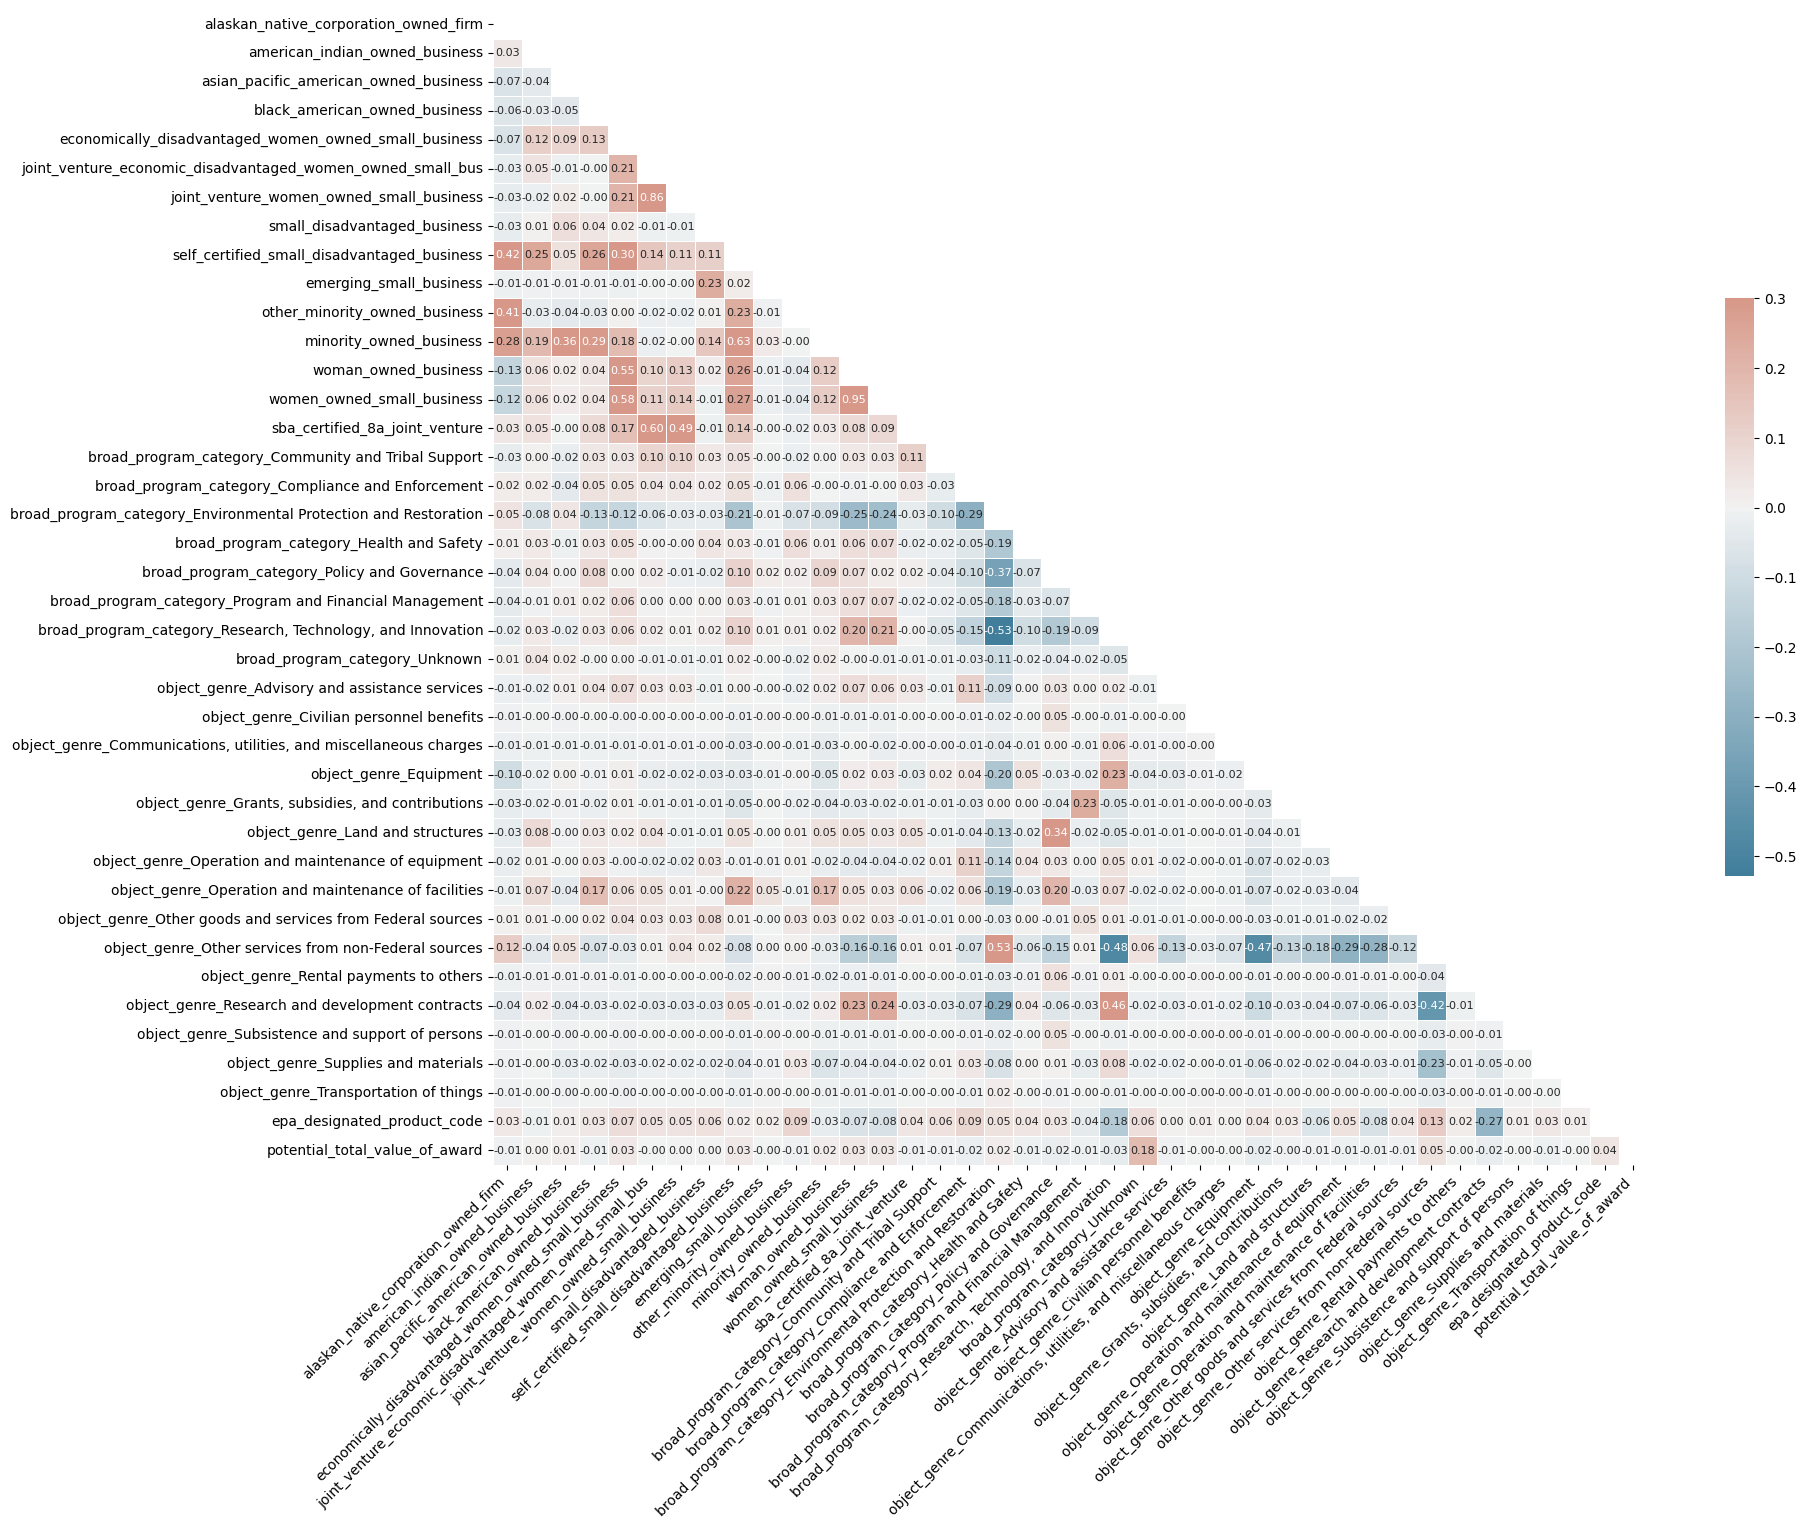

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = final_df.corr()

# Increase the figure size
plt.figure(figsize=(20, 15))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose a diverging color map
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create a heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f", annot_kws={"size": 8})

# Adjust the rotation of the x tick labels if needed
plt.xticks(rotation=45, ha='right')

# Adjust the rotation of the y tick labels if needed
plt.yticks(rotation=0)

# Show the plot
plt.show()



In [ ]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

df_VIF = final_df.drop(columns=['potential_total_value_of_award'])

# It's important to add a constant term for the intercept in the model
X = add_constant(df_VIF)

# Create a DataFrame that will contain the names of all the feature variables and their respective VIFs
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                                              Feature        VIF
0                                                               const   0.000000
1                               alaskan_native_corporation_owned_firm   1.725863
2                                      american_indian_owned_business   1.145830
3                               asian_pacific_american_owned_business   1.332213
4                                       black_american_owned_business   1.273033
5               economically_disadvantaged_women_owned_small_business   1.750847
6          joint_venture_economic_disadvantaged_women_owned_small_bus   4.875183
7                            joint_venture_women_owned_small_business   4.045824
8                                        small_disadvantaged_business   1.124987
9                         self_certified_small_disadvantaged_business   2.631780
10                                            emerging_small_business   1.062703
11                          

/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:365: RuntimeWarning: invalid value encountered in scalar subtract
  return points[1, 0] - points[0, 0]


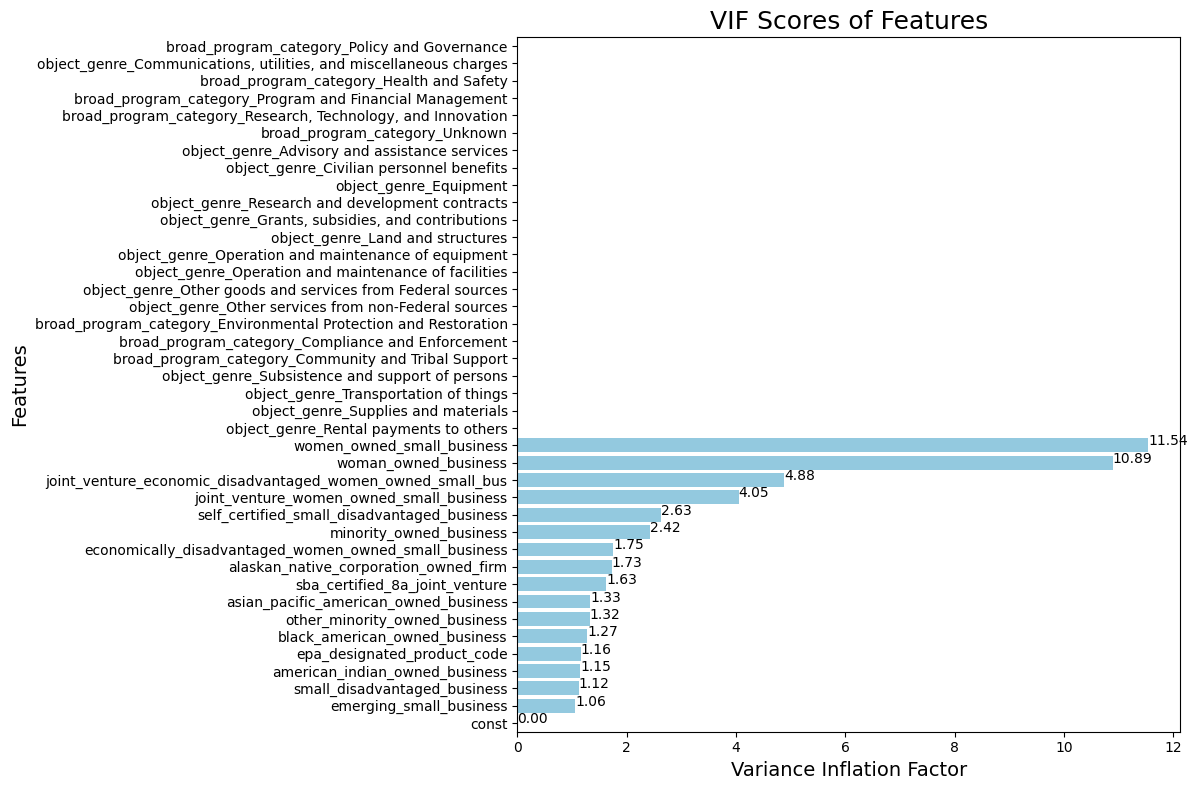

In [ ]:
#graph VIF

# Sort the DataFrame based on VIF values
vif_data_sorted = vif_data.sort_values('VIF', ascending=False)

# Plotting the VIF values
plt.figure(figsize=(12, 8))  # Increase figure size for better readability
sns.barplot(x='VIF', y='Feature', data=vif_data_sorted, color='skyblue')

# Adding the title and labels
plt.title('VIF Scores of Features', fontsize=18)
plt.xlabel('Variance Inflation Factor', fontsize=14)
plt.ylabel('Features', fontsize=14)

# Show values on the bars
for index, value in enumerate(vif_data_sorted['VIF']):
    plt.text(value, index, f'{value:.2f}')

plt.tight_layout()
plt.show()


# Predictive Model
We built our predictive model in Azure ML Studio Code. Please see live link the the README for deployment.